# Skip Connection

In [1]:
# 라이브러리 준비
import tensorflow as tf

In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 원핫 인코딩 수행
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [4]:
# 모델 생성

X = tf.keras.Input([32, 32, 3])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

for i in range(32):
    H1 = tf.keras.layers.Dense(256)(H)
    H1 = tf.keras.layers.BatchNormalization()(H)
    H1 = tf.keras.layers.Activation("swish")(H)
    H = tf.keras.layers.Add()([H,H1])

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 flatten_1 (Flatten)         (None, 3072)                 0         ['input_2[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 256)                  786688    ['flatten_1[0][0]']           
                                                                                                  
 batch_normalization_2 (Bat  (None, 256)                  1024      ['dense_2[0][0]']             
 chNormalization)                                                                             

                                                                     'activation_16[0][0]']       
                                                                                                  
 activation_17 (Activation)  (None, 256)                  0         ['add_13[0][0]']              
                                                                                                  
 add_14 (Add)                (None, 256)                  0         ['add_13[0][0]',              
                                                                     'activation_17[0][0]']       
                                                                                                  
 activation_18 (Activation)  (None, 256)                  0         ['add_14[0][0]']              
                                                                                                  
 add_15 (Add)                (None, 256)                  0         ['add_14[0][0]',              
          

                                                                                                  
 add_30 (Add)                (None, 256)                  0         ['add_29[0][0]',              
                                                                     'activation_33[0][0]']       
                                                                                                  
 activation_34 (Activation)  (None, 256)                  0         ['add_30[0][0]']              
                                                                                                  
 add_31 (Add)                (None, 256)                  0         ['add_30[0][0]',              
                                                                     'activation_34[0][0]']       
                                                                                                  
 dense_35 (Dense)            (None, 10)                   2570      ['add_31[0][0]']              
          

In [6]:
# 콜백함수 만들기
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        min_delta = 0, # 이보다 작게 변하면 변한다고 안할거임.
                                        patience = 10, # 이 회수(epoch)동안 개선이 없으면 끝냄
                                        restore_best_weights=True)
# 모델 학습
result = model.fit(x_train,
                   y_train, 
                   epochs=10, 
                   batch_size=128, 
                   validation_split=0.2, 
                   callbacks=[early])

Epoch 1/10
313/313 [==============================] - 9s 27ms/step - loss: 11949502.0000 - accuracy: 0.4307 - val_loss: 30839416.0000 - val_accuracy: 0.2983
Epoch 2/10
313/313 [==============================] - 9s 28ms/step - loss: 10295312.0000 - accuracy: 0.4248 - val_loss: 20929620.0000 - val_accuracy: 0.3026
Epoch 3/10
313/313 [==============================] - 8s 26ms/step - loss: 9072491.0000 - accuracy: 0.4224 - val_loss: 25228546.0000 - val_accuracy: 0.2846
Epoch 4/10
313/313 [==============================] - 9s 28ms/step - loss: 7990621.0000 - accuracy: 0.4200 - val_loss: 26418972.0000 - val_accuracy: 0.2945
Epoch 5/10
313/313 [==============================] - 9s 28ms/step - loss: 6807403.5000 - accuracy: 0.4159 - val_loss: 17993392.0000 - val_accuracy: 0.2882
Epoch 6/10
313/313 [==============================] - 9s 29ms/step - loss: 5944325.5000 - accuracy: 0.4102 - val_loss: 19208206.0000 - val_accuracy: 0.2861
Epoch 7/10
313/313 [==============================] - 8s 27ms/

In [7]:
# 모델 평가하기
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 15229904.0000 - accuracy: 0.2698


[15229904.0, 0.26980000734329224]

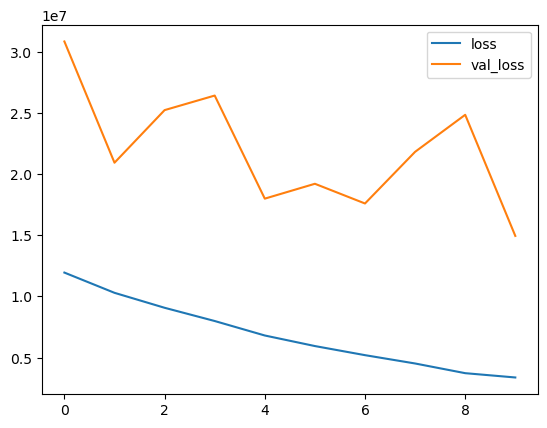

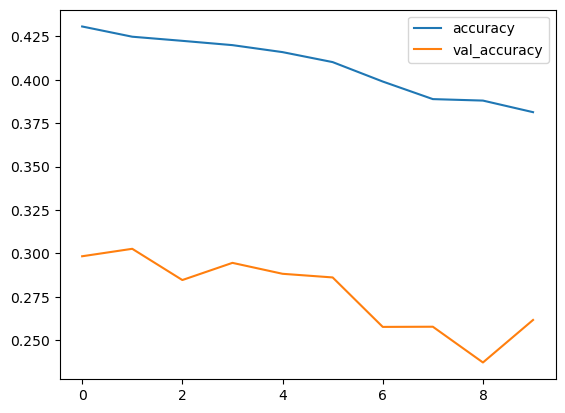

In [8]:
# 학습 시각화
import matplotlib.pyplot as plt

plt. plot(result.history['loss'])
plt. plot(result.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt. plot(result.history['accuracy'])
plt. plot(result.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()